In [438]:
# Ganeshan M

# Credit Prediction model

In [439]:
# Load in our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [440]:
# Credit Prediction model


# Data Preprocessing

# Data Loading

In [441]:
# Reading the data
train = pd.read_csv("cs-training.csv")
kaggle_test = pd.read_csv("cs-test.csv")

In [442]:

train.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766126609,45,2,0.802982129,9120.0,13,0,6,0,2.0
1,2,0,0.957151019,40,0,0.121876201,2600.0,4,0,0,0,1.0
2,3,0,0.65818014,38,1,0.085113375,3042.0,2,1,0,0,0.0
3,4,0,0.233809776,30,0,0.036049682,3300.0,5,0,0,0,0.0
4,5,0,0.9072394,49,1,0.024925695,63588.0,7,0,1,0,0.0


In [443]:
train.sample(5)


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
69161,69162,0,0.414369183,57,0,7818,NaN,16,0,1,0,0.0
18955,18956,0,0.080334074,42,1,2315,NaN,12,0,1,0,0.0
138219,138220,0,0.635202665,22,0,0.08478803,400.0,2,0,0,0,0.0
115694,115695,0,0.298119267,55,1,0.471932638,9975.0,20,0,5,0,1.0
72849,72850,0,0.071276949,74,0,0.362802641,2725.0,10,0,1,0,0.0


### Column 1



In [444]:
train.rename(columns = {train.columns[0]:'ID'}, inplace = True)


In [445]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  object 
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  object 
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

#### Column 2



In [446]:
train['SeriousDlqin2yrs'].unique()


array([1, 0])

In [447]:
P = train.groupby(by = 'SeriousDlqin2yrs')['ID'].count().reset_index()


In [448]:
P.rename(columns = {'ID':'Counts'},inplace = True)


In [449]:
P['Percent'] = P['Counts']*100/P['Counts'].sum()


In [450]:
P

,SeriousDlqin2yrs,Counts,Percent
0,0,139974,93.316
1,1,10026,6.684


### Column 3



In [451]:
train['RevolvingUtilizationOfUnsecuredLines'].describe()


count     150000
unique    125728
top            0
freq       10878
Name: RevolvingUtilizationOfUnsecuredLines, dtype: object

## Finding missing values

In [452]:
train.isnull().sum()


ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [453]:
train.duplicated().sum()


0

In [454]:
kaggle_test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [455]:
train_clean = train.copy()

In [456]:
train_clean.drop_duplicates(inplace=True)


In [457]:
def fill_na(df):
    na_list = [i for i in df.isnull().sum().index if df.isnull().sum()[i] > 0]
    for n in na_list:
        train_fillna = train_clean[n][train_clean[n].isna() == False]
        train_clean[n].fillna(train_fillna.median(), inplace=True)

In [458]:
fill_na(train_clean)
train_clean.isnull().sum()

ID                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Data Summarizaton

In [459]:
train.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766126609,45,2,0.802982129,9120.0,13,0,6,0,2.0
1,2,0,0.957151019,40,0,0.121876201,2600.0,4,0,0,0,1.0
2,3,0,0.65818014,38,1,0.085113375,3042.0,2,1,0,0,0.0
3,4,0,0.233809776,30,0,0.036049682,3300.0,5,0,0,0,0.0
4,5,0,0.9072394,49,1,0.024925695,63588.0,7,0,1,0,0.0


In [460]:
train.shape

(150000, 12)

In [461]:
train.describe()

,ID,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,52.295207,0.421033,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,14.771866,4.192781,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,41.000000,0.000000,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,52.000000,0.000000,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,63.000000,0.000000,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,109.000000,98.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [462]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  object 
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  object 
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

# Data Visualization

<AxesSubplot:>

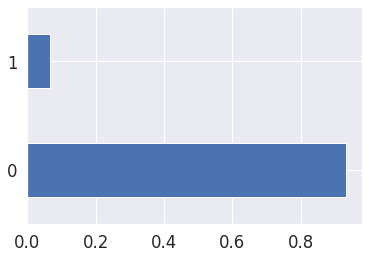

In [463]:
train['SeriousDlqin2yrs'].value_counts(normalize = True).plot(kind= 'barh')

## Age Distribution of Lenders

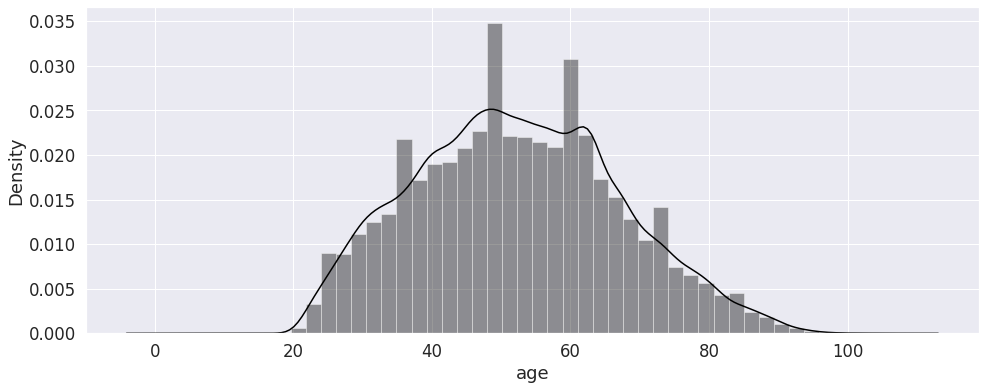

In [464]:
plt.figure(figsize=(16, 6))
sns.distplot(train_clean["age"], color = "black");

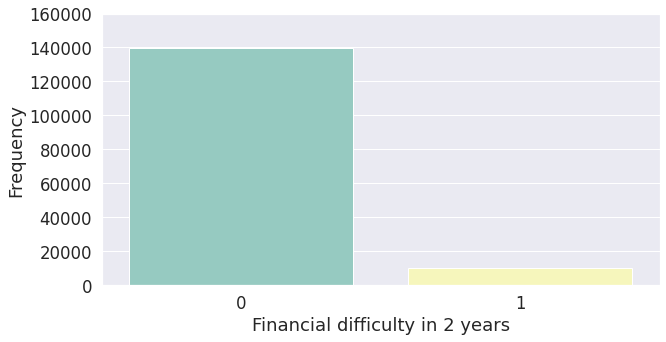

In [465]:
ax = sns.countplot(x = train.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Financial difficulty in 2 years')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

We detected 3527 outliers in the training set, which represents 2.53% of our training data. We will drop these outliers.

## Merging datasets

In [466]:
train_len = len(train)
dataset =  pd.concat(objs=[train, kaggle_test], axis=0).reset_index(drop=True)

In [467]:
dataset.shape

(251503, 13)

In [468]:
dataset = dataset.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

train = train.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

kaggle_test = kaggle_test.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})



## Data Visualization

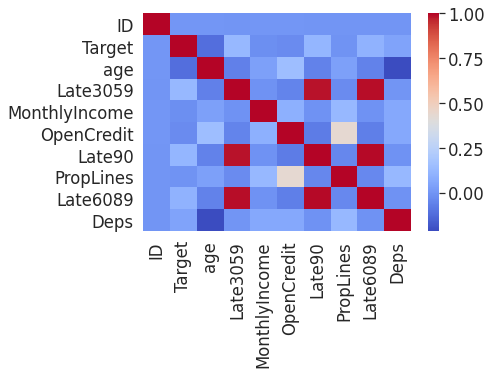

In [469]:
# Correlation matrix
g = sns.heatmap(train.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

We can see that the Target has the highest correlation with age, previous late payments, and the number of dependants.

## Data  Summarizion

Exploring UnsecLines

In [470]:
# dataset.UnsecLines.describe()

# Data Visualization

We can that there is an almost exponential relationship between this variable and our target.

## Exploring Age

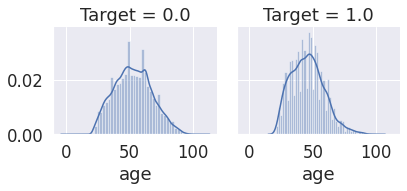

In [471]:
# Explore Age vs Survived
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "age")

In [472]:
dataset.age = pd.qcut(dataset.age.values, 5).codes

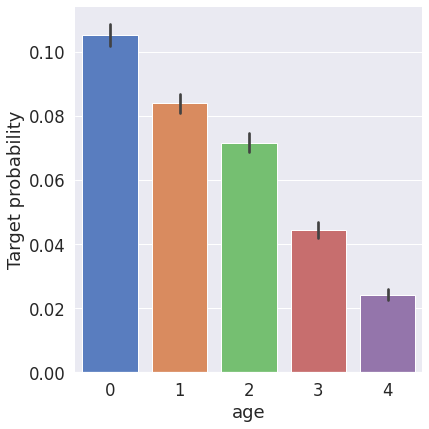

In [473]:
# Explore age feature vs Target
g  = sns.factorplot(x="age",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

We can see that age has an inverse relationship to default risk

## Exploring Late3059

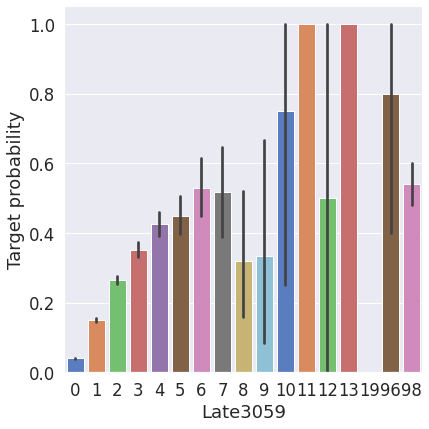

In [474]:
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="Late3059",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [475]:
for i in range(len(dataset)):
    if dataset.Late3059[i] >= 6:
        dataset.Late3059[i] = 6

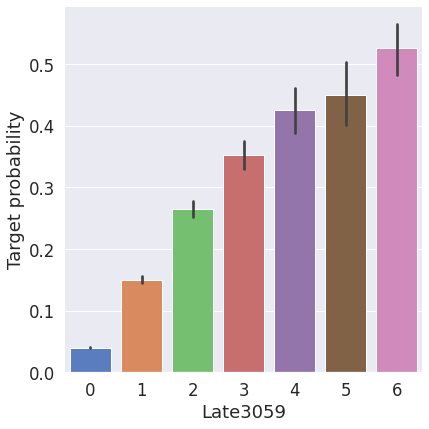

In [476]:
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="Late3059",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

Due to very high standard deviations we decided to group customers who have 6 or more late payments together. We can see that this has boosted the predictive capacity and reduced the variance of Late3059

## Exploring MonthlyIncome

In [477]:
dataset.MonthlyIncome.isnull().sum()


49834

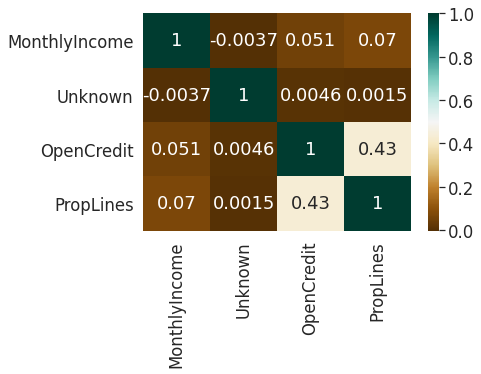

In [478]:
g = sns.heatmap(dataset[["MonthlyIncome","Unknown","UnsecLines","OpenCredit","PropLines"]].corr(),cmap="BrBG",annot=True)

We can see that MonthlyIncome has no strong correlation with any other variable so we cannot accurately estimate the NaN values. Thus, we will fill the NaN with the median value

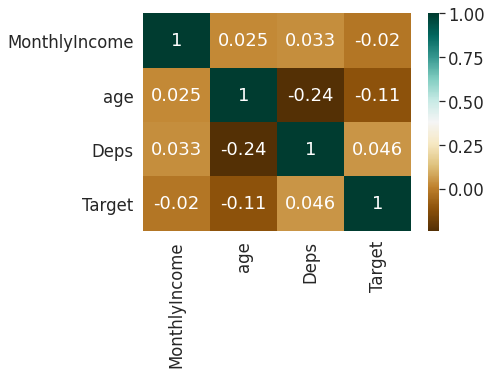

In [479]:
g = sns.heatmap(dataset[["MonthlyIncome","age","DebtRatio","Deps","Target"]].corr(),cmap="BrBG",annot=True)

In [480]:
dataset.MonthlyIncome.median()

5400.0

In [481]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset.MonthlyIncome = dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())

In [482]:
dataset.MonthlyIncome = pd.qcut(dataset.MonthlyIncome.values, 5).codes

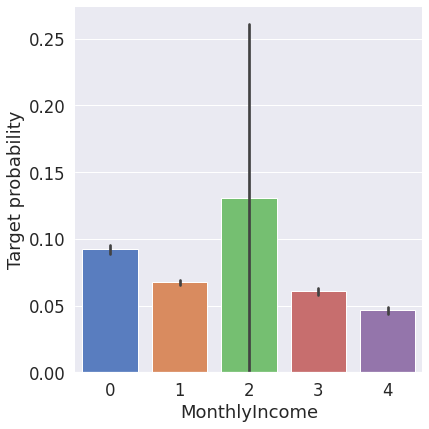

In [483]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="MonthlyIncome",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Exploring OpenCredit

In [484]:
dataset.OpenCredit.describe()

count    251503.000000
mean          8.453064
std           5.145194
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          85.000000
Name: OpenCredit, dtype: float64

In [485]:
dataset.OpenCredit = pd.qcut(dataset.OpenCredit.values, 5).codes

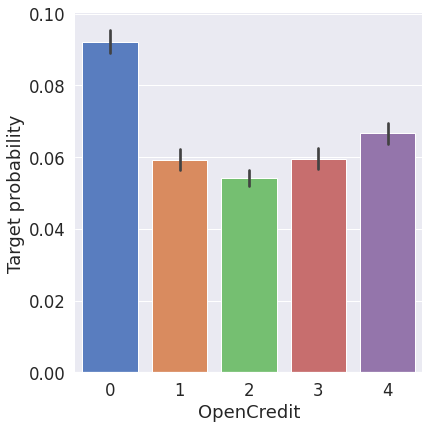

In [486]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="OpenCredit",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Exploring Late90

In [487]:
dataset.Late90.describe()

count    251503.000000
mean          0.278370
std           4.312539
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Late90, dtype: float64

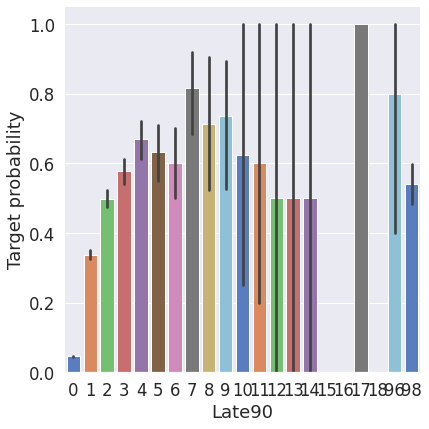

In [488]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Late90",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [489]:
for i in range(len(dataset)):
    if dataset.Late90[i] >= 5:
        dataset.Late90[i] = 5

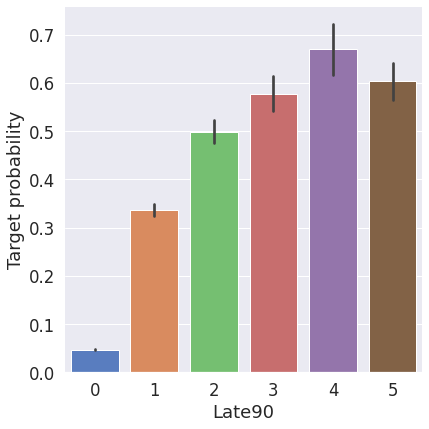

In [490]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Late90",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Exploring PropLines

In [491]:
dataset.PropLines.describe()

count    251503.000000
mean          1.016155
std           1.121935
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: PropLines, dtype: float64

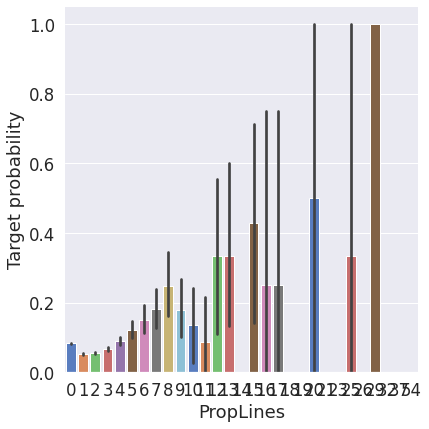

In [492]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="PropLines",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [493]:
for i in range(len(dataset)):
    if dataset.PropLines[i] >= 6:
        dataset.PropLines[i] = 6

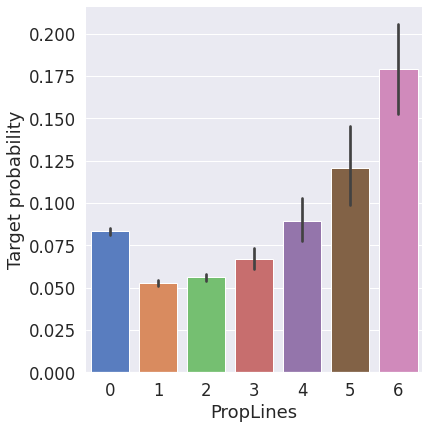

In [494]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="PropLines",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Exploring Late6089

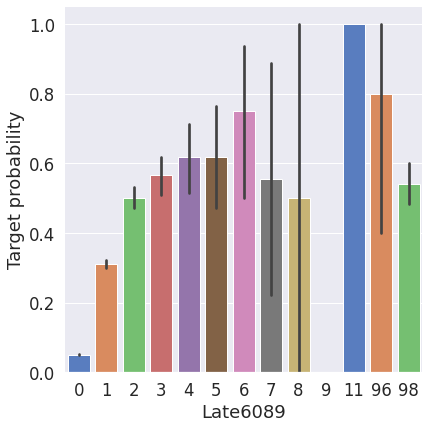

In [495]:
# Explore Late6089 feature quantiles vs Target
g  = sns.factorplot(x="Late6089",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [496]:
for i in range(len(dataset)):
    if dataset.Late6089[i] >= 3:
        dataset.Late6089[i] = 3

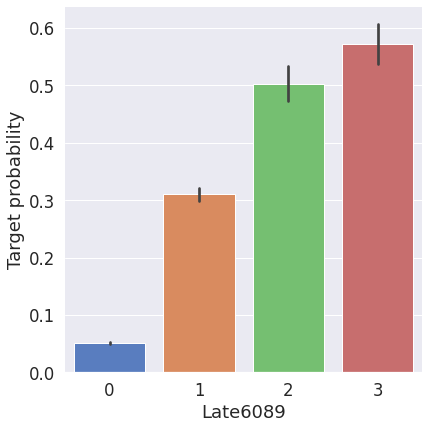

In [497]:
# Explore Late6089 feature quantiles vs Target
g  = sns.factorplot(x="Late6089",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

## Exploring Deps

In [498]:
dataset.Deps.describe()

count    244953.000000
mean          0.761995
std           1.123905
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          43.000000
Name: Deps, dtype: float64

In [499]:
dataset.Deps = dataset.Deps.fillna(dataset.Deps.median())

In [500]:
dataset.Deps.isnull().sum()

0

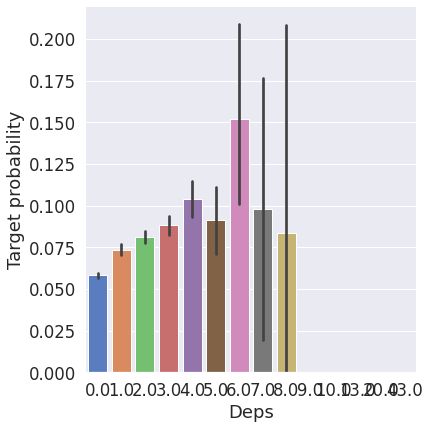

In [501]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Deps",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [502]:
for i in range(len(dataset)):
    if dataset.Deps[i] >= 4:
        dataset.Deps[i] = 4

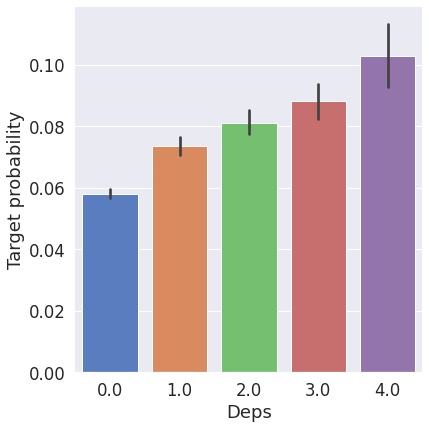

In [503]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="Deps",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

Building binary/dummy variables

In [504]:
train = dataset[:train_len]
Kaggle_test = dataset[train_len:]
Kaggle_test.drop(labels=["Target"],axis = 1,inplace=True)

In [505]:
Kaggle_test.shape


(101503, 12)

In [506]:
train["Target"] = train["Target"].astype(int)

Y_train = train["Target"]

X_train = train.drop(labels = ["Target", "Unknown"],axis = 1)

# Data interpretaion


<ul>
    <li>MonthlyIncome and NumberOfDependents have 29731 (19.82%) and 3924 (2.61%) null values respectively</li>
    <li>NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse share the same values, specifically 96 and 98.</li>
    </ul>
    <ul>
    <li>We can see that sharing the same values of 96 and 98 respectively is not logical since trivial calculations can reveal that being 30 days past due for 96 times for a single person within a timespan of 2 years is not possible.</li>
    </ul>
    <ul>
<li>RevolvingUtilizationOfUnsecuredLines</li>
    </ul>
        <ul>
    <li>Defined as ratio of the total amount of money owed to total credit limit distribution of values is right-skewed, consider removing outliers</li>
    </ul>
    <li>It is expected that as this value increases, the proportion of people defaulting should increase as well</li>
    <li>However, we can see that as the minimum value of this column is set to 13, the proportion of defaulters is smaller than that belonging to the pool of clients with total amount of money owed not exceeding total credit limit.</li>
    <li>Thus we should remove those samples with RevolvingUtilizationOfUnsecuredLines's value more than equal to 13</li>
           </ul>
    <li>age</li>
    <li>There seems to be more younger people defaulting and the distribution seems fine on the whole</li>
    <li>NumberOfTimes90DaysLate</li>
    <li>It is interesting to note that there are no one who is 90 or more days past due between 17 and 96 times.</li>
    <li>NumberOfTime60-89DaysPastDueNotWorse
</li>
    <li>It is interesting to note that there are no one who is 60-89 days past due between 11 and 96 times.</li>
    <li>NumberOfTime30-59DaysPastDueNotWorse
</li>
    <li>It is interesting to note that there are no one who is 30-59 days past due between 13 and 96 times.
</li>
    <li>DebtRatio</li>
    <li>2.5% of clients owe around 3490 or more times what they own
</li>
    <li>For the people who have monthly income in this 2.5%, only 185 people have values for their monthly incomes and the values are either 0 or 1.</li>
    <li>There are 164 out of these 185 people who are of two different types, first with no monthly income and does not default and second with monthly income and does default.</li>
    <li>MonthlyIncome</li>
    <li>Distribution of values is skewed, we can consider imputation with median.</li>
     <li>We can also consider imputing with normally distributed values with its mean and standard deviation.</li>
      <li>Numberof Dependents</li>
      <li>We can consider imputing with its mode, which is zero.
</li>

